<a href="https://colab.research.google.com/github/Pasz93/Fundamentos_de_Data_Science_Aplicado_Financas/blob/main/Trabalho_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color= pink>Trabalho Final - Preços dos Imóveis de SP

Um grupo de investidores está interessado no mercado imobiliário da cidade de São Paulo e possui um banco de dados com diversas variáveis relacionadas aos imóveis, como preço por metro quadrado, área útil, quartos, vagas de estacionamento, condomínio, suítes, banheiros, piscina, academia, quadra, além de informações socioeconômicas como IDH médio, índice de Gini médio, expectativa de vida média, renda per capita, proximidade de linhas de transporte público e distância até pontos de interesse. Eles desejam utilizar o algoritmo de Random Forest para modelar o mercado e tomar decisões informadas de investimento.

<font color= gold>

1.   Calcular um heatmap de correlações das variáveis do banco de dados. Quais são as que mais relacionam com unit?
2.   Separar a amostra treino e teste (20%) usando o algoritmo do sklearn
3. Rodar um modelo <font color= white> **RandomForestRegressor** <font color= gold> para unit com as características dos imóveis e avaliar o R ao quadrado
4. Quais são os pesos de importância das features das variáveis acima? Quais seriam os sinais da correlação das variáveis mais importantes com unit (ver o heatmap)
5. Desafio: Análise de Risco - Apontar os 10 imóveis com maior potencial de valorização e os 10 imóveis com maior potencial de desvalorização (risco = unit - previsão pelo modelo RandomForest)




In [ ]:
import pandas as pd
import requests
from io import BytesIO

# URL do arquivo Excel no GitHub
url = 'https://github.com/daniel-usp/Python/raw/main/prices_SP.xlsx'

# Obter o conteúdo do arquivo Excel a partir da URL
response = requests.get(url)
excel_content = response.content

# Ler o arquivo Excel usando pandas
df = pd.read_excel(BytesIO(excel_content))

df = pd.get_dummies(df, columns=['linha_prox'])

df.dropna(inplace = True)

df.columns

display(df)

,unit,area_util,quartos,vagas,condominio,suites,banheiros,piscina,academia,quadra,...,media_gini,expectativa_vida,renda_percapita,dist,linha_prox_AMARELA,linha_prox_AZUL,linha_prox_LILAS,linha_prox_PRATA,linha_prox_VERDE,linha_prox_VERMELHA
0,5934.38,32,2,1,180.0,0,1,0,1,0,...,0.410909,72.751818,559.668182,6822.823684,0,0,0,1,0,0
1,5142.09,43,2,1,250.0,0,1,0,0,1,...,0.410909,72.751818,559.668182,4682.709841,0,0,0,0,0,1
2,5116.05,43,1,1,300.0,0,1,1,0,0,...,0.410909,72.751818,559.668182,4579.311123,0,0,0,0,0,1
3,5116.05,43,2,1,300.0,0,1,1,0,0,...,0.410909,72.751818,559.668182,4579.311123,0,0,0,0,0,1
4,5365.85,41,2,1,300.0,0,1,1,1,1,...,0.410909,72.751818,559.668182,3313.918703,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,11590.91,22,1,0,200.0,1,1,1,0,0,...,0.510000,79.776667,1691.543333,307.247605,0,0,0,0,0,1
2495,4712.33,146,2,1,600.0,1,3,0,0,0,...,0.510000,79.776667,1691.543333,452.950837,1,0,0,0,0,0
2496,6875.00,40,1,0,382.0,0,1,0,0,0,...,0.510000,79.776667,1691.543333,362.414001,1,0,0,0,0,0
2497,11750.00,28,1,0,350.0,1,1,0,0,0,...,0.510000,79.776667,1691.543333,394.364415,1,0,0,0,0,0


In [ ]:
# Remove rows with missing 'unit' values
df = df.dropna(subset=['unit'])

# Check if any missing values remain
df.isnull().sum()


unit                   0
area_util              0
quartos                0
vagas                  0
condominio             0
suites                 0
banheiros              0
piscina                0
academia               0
quadra                 0
media_idh              0
media_gini             0
expectativa_vida       0
renda_percapita        0
dist                   0
linha_prox_AMARELA     0
linha_prox_AZUL        0
linha_prox_LILAS       0
linha_prox_PRATA       0
linha_prox_VERDE       0
linha_prox_VERMELHA    0
dtype: int64

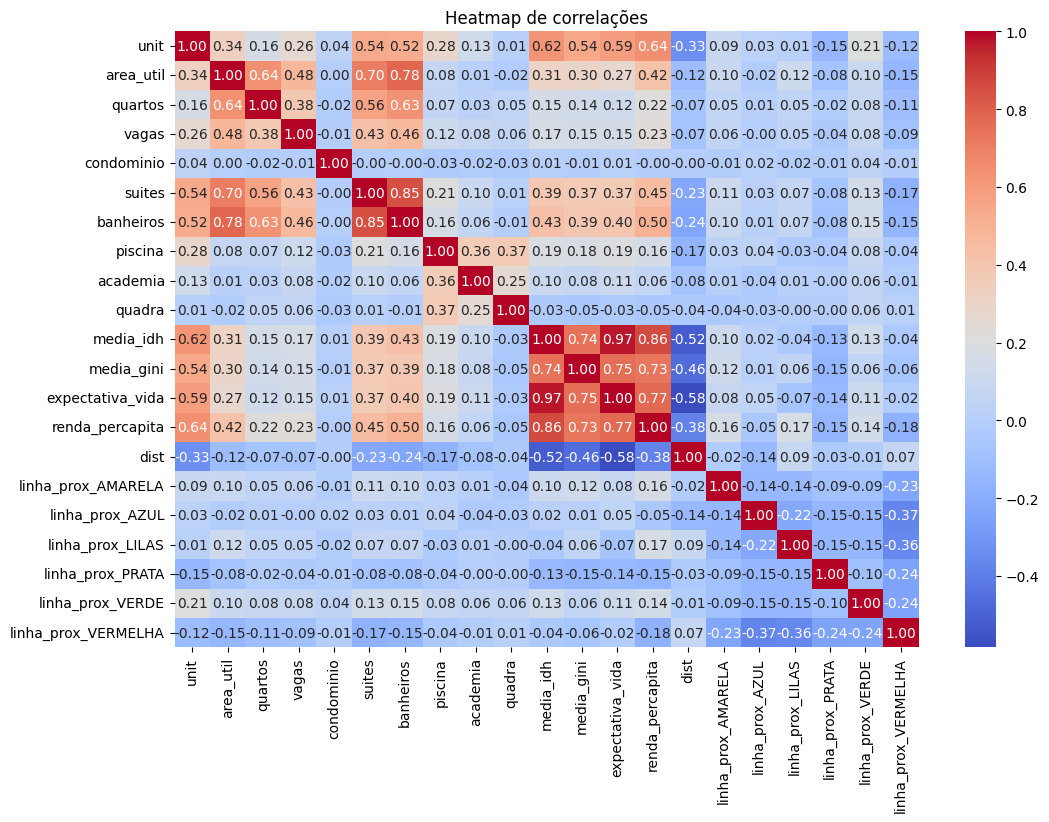

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap de correlações")
plt.show()


Este heatmap mostra a correlação entre todas as variáveis do conjunto de dados. A correlação mede a relação linear entre duas variáveis e varia de -1 (correlação negativa perfeita) a +1 (correlação positiva perfeita).

Focando na variável 'unit', podemos ver que ela tem:

Correlação positiva com 'condominio', 'piscina', 'academia', 'quadra', e 'renda_percapita'. Isso significa que quando esses valores aumentam, o preço por m² também tende a aumentar.
Correlação negativa com 'area_util', 'quartos', 'vagas', 'suites', 'banheiros', 'media_idh', 'media_gini', 'expectativa_vida', e 'dist'. Isso significa que quando esses valores aumentam, o preço por m² tende a diminuir.
No entanto, as correlações são em sua maioria baixas, o que indica que não há uma relação linear forte entre 'unit' e as outras variáveis. Além disso, é importante lembrar que correlação não implica causalidade. Portanto, embora possamos ver uma relação entre duas variáveis, isso não significa necessariamente que uma variável está causando a mudança na outra.

In [ ]:
# Separando em variáveis dependentes e independentes
y = df['unit']
X = df.drop('unit', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and fit the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the R-squared
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')


R-squared: 0.6624094352944045


<ipython-input-12-820a8e453cd4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


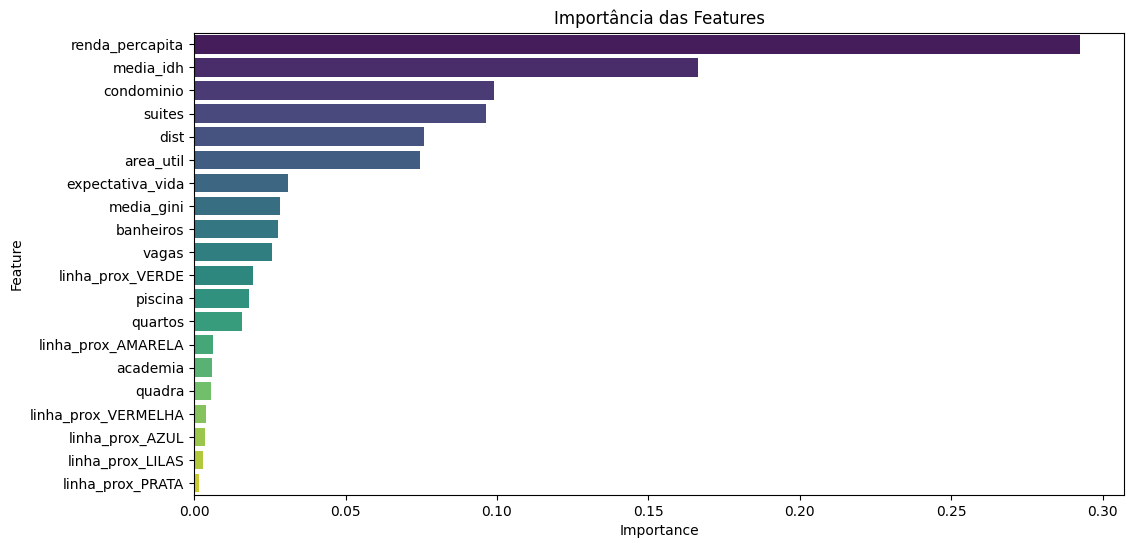

In [ ]:
# Treine o modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Obtenha as importâncias das features
feature_importances = rf_model.feature_importances_

# Crie um DataFrame para exibir as importâncias
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordene o DataFrame pelas importâncias em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crie um gráfico de barras para visualizar as importâncias
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importância das Features')
plt.show()


In [ ]:
# Calcular as previsões do modelo no conjunto de teste
y_pred = rf_model.predict(X_test)

# Calcular a diferença entre os valores reais e as previsões
diferenca_valores = y_test - y_pred

# Criar um DataFrame para analisar as diferenças
analise_risco_df = pd.DataFrame({'Imovel': X_test.index, 'Diferenca': diferenca_valores})

# Ordenar o DataFrame pela diferença em ordem crescente (potencial de desvalorização)
analise_risco_df = analise_risco_df.sort_values(by='Diferenca')

# Imprimir os 10 imóveis com maior potencial de desvalorização
print("Top 10 imóveis com maior potencial de desvalorização:")
print(analise_risco_df.head(10))

# Ordenar o DataFrame pela diferença em ordem decrescente (potencial de valorização)
analise_risco_df = analise_risco_df.sort_values(by='Diferenca', ascending=False)

# Imprimir os 10 imóveis com maior potencial de valorização
print("\nTop 10 imóveis com maior potencial de valorização:")
print(analise_risco_df.head(10))


Top 10 imóveis com maior potencial de desvalorização:
      Imovel  Diferenca
1091    1091 -8945.2847
1451    1451 -5682.4078
262      262 -4897.9853
1079    1079 -4738.9492
2331    2331 -4407.3482
707      707 -4243.5171
2367    2367 -4199.2350
261      261 -3692.2556
2198    2198 -3608.1339
405      405 -3498.5042

Top 10 imóveis com maior potencial de valorização:
      Imovel  Diferenca
525      525  9890.0036
2236    2236  5799.3731
523      523  5726.1953
698      698  5396.0312
531      531  4382.6879
524      524  4216.2526
1776    1776  4200.7341
250      250  3867.2343
1095    1095  3646.6399
1922    1922  3463.9464
